In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',**{'family':'Microsoft YaHei,SimHei'})

In [2]:
con = pymysql.connect(host='localhost',user='root',password='',db='doubandb',charset='utf8')

In [3]:
sql = 'select * from books1'
data = pd.read_sql(sql,con)
con.close()

In [4]:
data.head()

,id,title,author,press,original,translator,imprint,pages,price,binding,series,isbn,score,number
0,1,None,None,None,None,None,None,None,NaN,None,None,None,NaN,NaN
1,1000153,印象主义创始者:马奈,,河北教育出版社,,,2000-12,183,78.0,平装,世界名画家全集,9787543439337,7.8,92.0
2,1000531,第二次世界大战回忆录（全六卷）,,南方出版社,,"吴万沈等、<span property=""v:votes"">723</span>人评价",2003-4-1,2975,298.0,精装,,9787806608050,8.7,723.0
3,1000759,古代人的自由与现代人的自由,,商务印书馆,,阎克文 刘满贵、公共译丛,1999-12,473,27.0,平装,公共译丛,9787100029629,8.3,222.0
4,1001871,梵高,,河北教育出版社,,,1998-07,255,78.0,铜版纸彩印平装,世界名画家全集,9787543431485,8.7,498.0


In [5]:
# 2. 对数据做清洗(缺失值与异常值)
data = data.dropna(subset=['press', 'title', 'number','price', 'score']) # 丢弃缺失值
# 异常值的界定没想出来，暂时不处理异常值

In [6]:
#data[data['imprint']==' 2003.5']

In [7]:
# 3. 分析书的数量与年份的关系
t = pd.to_datetime(data.imprint)
data.index = t
data.head(2)

,id,title,author,press,original,translator,imprint,pages,price,binding,series,isbn,score,number
imprint,,,,,,,,,,,,,,
2000-12-01,1000153,印象主义创始者:马奈,,河北教育出版社,,,2000-12,183,78.0,平装,世界名画家全集,9787543439337,7.8,92.0
2003-04-01,1000531,第二次世界大战回忆录（全六卷）,,南方出版社,,"吴万沈等、<span property=""v:votes"">723</span>人评价",2003-4-1,2975,298.0,精装,,9787806608050,8.7,723.0


In [8]:
one = np.ones((len(data.index),1),dtype='int')
one = pd.DataFrame(one,index=data.index,columns=['num'])
one.head()
data = pd.concat([data,one],axis=1)
data.head()

,id,title,author,press,original,translator,imprint,pages,price,binding,series,isbn,score,number,num
imprint,,,,,,,,,,,,,,,
2000-12-01,1000153,印象主义创始者:马奈,,河北教育出版社,,,2000-12,183,78.0,平装,世界名画家全集,9787543439337,7.8,92.0,1
2003-04-01,1000531,第二次世界大战回忆录（全六卷）,,南方出版社,,"吴万沈等、<span property=""v:votes"">723</span>人评价",2003-4-1,2975,298.0,精装,,9787806608050,8.7,723.0,1
1999-12-01,1000759,古代人的自由与现代人的自由,,商务印书馆,,阎克文 刘满贵、公共译丛,1999-12,473,27.0,平装,公共译丛,9787100029629,8.3,222.0,1
1998-07-01,1001871,梵高,,河北教育出版社,,,1998-07,255,78.0,铜版纸彩印平装,世界名画家全集,9787543431485,8.7,498.0,1
2002-05-01,1001885,带一本书去巴黎,,生活·读书·新知三联书店,,,2002-5,287,35.0,平装,林达作品系列,9787108017079,8.5,19853.0,1


In [9]:
data_year = data.groupby(data.index.year).sum()
data_year.head()

,id,price,score,number,num
imprint,,,,,
1900,1744142,58.00,8.7,71.0,1
1953,1012637,13.90,8.2,13988.0,1
1955,2221902,12.00,8.0,2478.0,1
1957,3312635,0.34,9.6,27.0,1
1958,1877291,0.28,8.5,1277.0,1


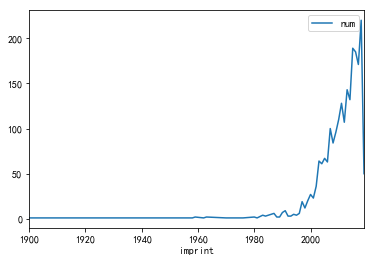

In [10]:
data_year.plot(y=['num'])
plt.show()

In [12]:
# x = data[data['score']==0]
# data1 = data.drop(x.index)
data1 = data

In [13]:
# 4. 分析书籍的评分与年代之间是否有某种关系
data_score = data1.groupby(data1.index.year).mean()
data_score.head()

,id,price,score,number,num
imprint,,,,,
1900,1744142.0,58.00,8.7,71.0,1
1953,1012637.0,13.90,8.2,13988.0,1
1955,2221902.0,12.00,8.0,2478.0,1
1957,3312635.0,0.34,9.6,27.0,1
1958,1877291.0,0.28,8.5,1277.0,1


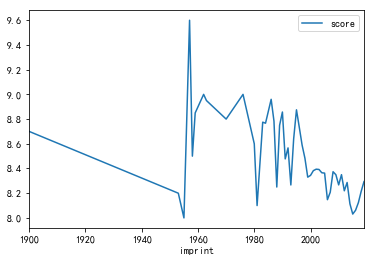

In [14]:
data_score.plot(y=['score'])
plt.show()

In [15]:
# 5. 书籍的价格⼀般都是在什么范围  纵坐标是啥？
data.head()

,id,title,author,press,original,translator,imprint,pages,price,binding,series,isbn,score,number,num
imprint,,,,,,,,,,,,,,,
2000-12-01,1000153,印象主义创始者:马奈,,河北教育出版社,,,2000-12,183,78.0,平装,世界名画家全集,9787543439337,7.8,92.0,1
2003-04-01,1000531,第二次世界大战回忆录（全六卷）,,南方出版社,,"吴万沈等、<span property=""v:votes"">723</span>人评价",2003-4-1,2975,298.0,精装,,9787806608050,8.7,723.0,1
1999-12-01,1000759,古代人的自由与现代人的自由,,商务印书馆,,阎克文 刘满贵、公共译丛,1999-12,473,27.0,平装,公共译丛,9787100029629,8.3,222.0,1
1998-07-01,1001871,梵高,,河北教育出版社,,,1998-07,255,78.0,铜版纸彩印平装,世界名画家全集,9787543431485,8.7,498.0,1
2002-05-01,1001885,带一本书去巴黎,,生活·读书·新知三联书店,,,2002-5,287,35.0,平装,林达作品系列,9787108017079,8.5,19853.0,1


In [16]:
# 6 出版的书籍最多的前20个出版社
z = data[data['press']=='']
data_p = data.drop(z.index)
data_p = data_p.set_index('press')

data_p.head()

,id,title,author,original,translator,imprint,pages,price,binding,series,isbn,score,number,num
press,,,,,,,,,,,,,,
河北教育出版社,1000153,印象主义创始者:马奈,,,,2000-12,183,78.0,平装,世界名画家全集,9787543439337,7.8,92.0,1
南方出版社,1000531,第二次世界大战回忆录（全六卷）,,,"吴万沈等、<span property=""v:votes"">723</span>人评价",2003-4-1,2975,298.0,精装,,9787806608050,8.7,723.0,1
商务印书馆,1000759,古代人的自由与现代人的自由,,,阎克文 刘满贵、公共译丛,1999-12,473,27.0,平装,公共译丛,9787100029629,8.3,222.0,1
河北教育出版社,1001871,梵高,,,,1998-07,255,78.0,铜版纸彩印平装,世界名画家全集,9787543431485,8.7,498.0,1
生活·读书·新知三联书店,1001885,带一本书去巴黎,,,,2002-5,287,35.0,平装,林达作品系列,9787108017079,8.5,19853.0,1


In [17]:
data_press = data_p.groupby(data_p.index).sum()
data_press.head()

,id,price,score,number,num
press,,,,,
\n,5087177,140.0,27.5,133.0,3
&#34;湖南科学技术出版社&#34;,30351266,58.0,8.1,23.0,1
99读书人|人民文学出版社,30172069,62.0,9.2,12808.0,1
Andrews McMeel Publishing,4589676,0.0,9.3,23.0,1
Cambridge University Press,2878720,0.0,8.7,37.0,1


In [18]:
data_press = data_press.sort_values(by='num',ascending=False)
data_press.head(20)

,id,price,score,number,num
press,,,,,
上海译文出版社,845977857,2687.40,802.4,1349029.0,96
中信出版社,1822727787,3885.00,701.4,444610.0,87
生活·读书·新知三联书店,692443021,2556.30,512.9,584973.0,60
译林出版社,830284837,2726.30,501.9,513063.0,60
湖南文艺出版社,1291056826,2057.80,432.1,428548.0,56
人民文学出版社,456520666,1714.85,419.3,1359485.0,49
人民邮电出版社,841011072,3227.70,424.4,71454.0,49
南海出版公司,630696270,1563.70,402.8,966904.0,49
商务印书馆,746673280,1753.58,420.4,30098.0,48


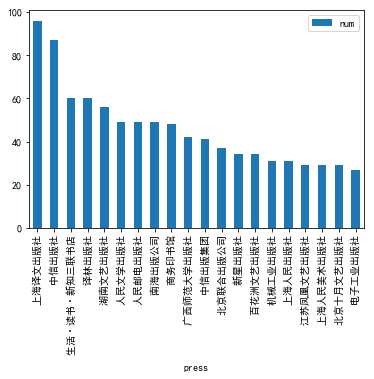

In [19]:
data_press.head(20).plot(kind='bar',y=['num'])
plt.show()

In [20]:
# 7. 书籍评分⽐较⾼出版社
data_press = data_p.groupby(data_p.index).mean()
data_press.head()

,id,price,score,number,num
press,,,,,
\n,1.695726e+06,46.666667,9.166667,44.333333,1
&#34;湖南科学技术出版社&#34;,3.035127e+07,58.000000,8.100000,23.000000,1
99读书人|人民文学出版社,3.017207e+07,62.000000,9.200000,12808.000000,1
Andrews McMeel Publishing,4.589676e+06,0.000000,9.300000,23.000000,1
Cambridge University Press,2.878720e+06,0.000000,8.700000,37.000000,1


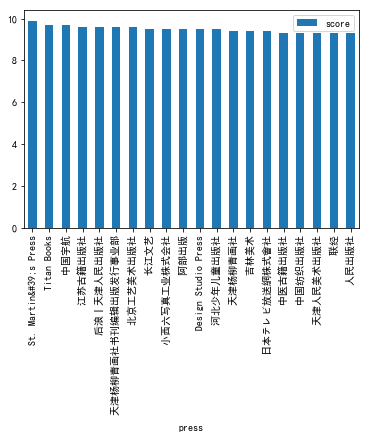

In [21]:
data_press = data_press.sort_values(by='score',ascending=False)
data_press.head(20).plot(kind='bar',y=['score'])
plt.show()

In [22]:
# 8. 出书多的作者
data.head(2)  

,id,title,author,press,original,translator,imprint,pages,price,binding,series,isbn,score,number,num
imprint,,,,,,,,,,,,,,,
2000-12-01,1000153,印象主义创始者:马奈,,河北教育出版社,,,2000-12,183,78.0,平装,世界名画家全集,9787543439337,7.8,92.0,1
2003-04-01,1000531,第二次世界大战回忆录（全六卷）,,南方出版社,,"吴万沈等、<span property=""v:votes"">723</span>人评价",2003-4-1,2975,298.0,精装,,9787806608050,8.7,723.0,1


In [23]:
# 我的数据里面作者都是空的，所以这个就不做了

In [24]:
# 9. 评份⾼与评论数量这间是否存在某种关系
data.corr()

,id,price,score,number,num
id,1.000000,0.069673,-0.134723,-0.232168,NaN
price,0.069673,1.000000,0.129877,-0.069603,NaN
score,-0.134723,0.129877,1.000000,0.010442,NaN
number,-0.232168,-0.069603,0.010442,1.000000,NaN
num,NaN,NaN,NaN,NaN,NaN


In [25]:
# 看相关性接近0，应该是关系不大